In [1]:
import os
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from Utils99 import *
from Utils_graph import *
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

window = 1024
fs = 25600

PLOT ALL FEATURES AND SAVE PLOT

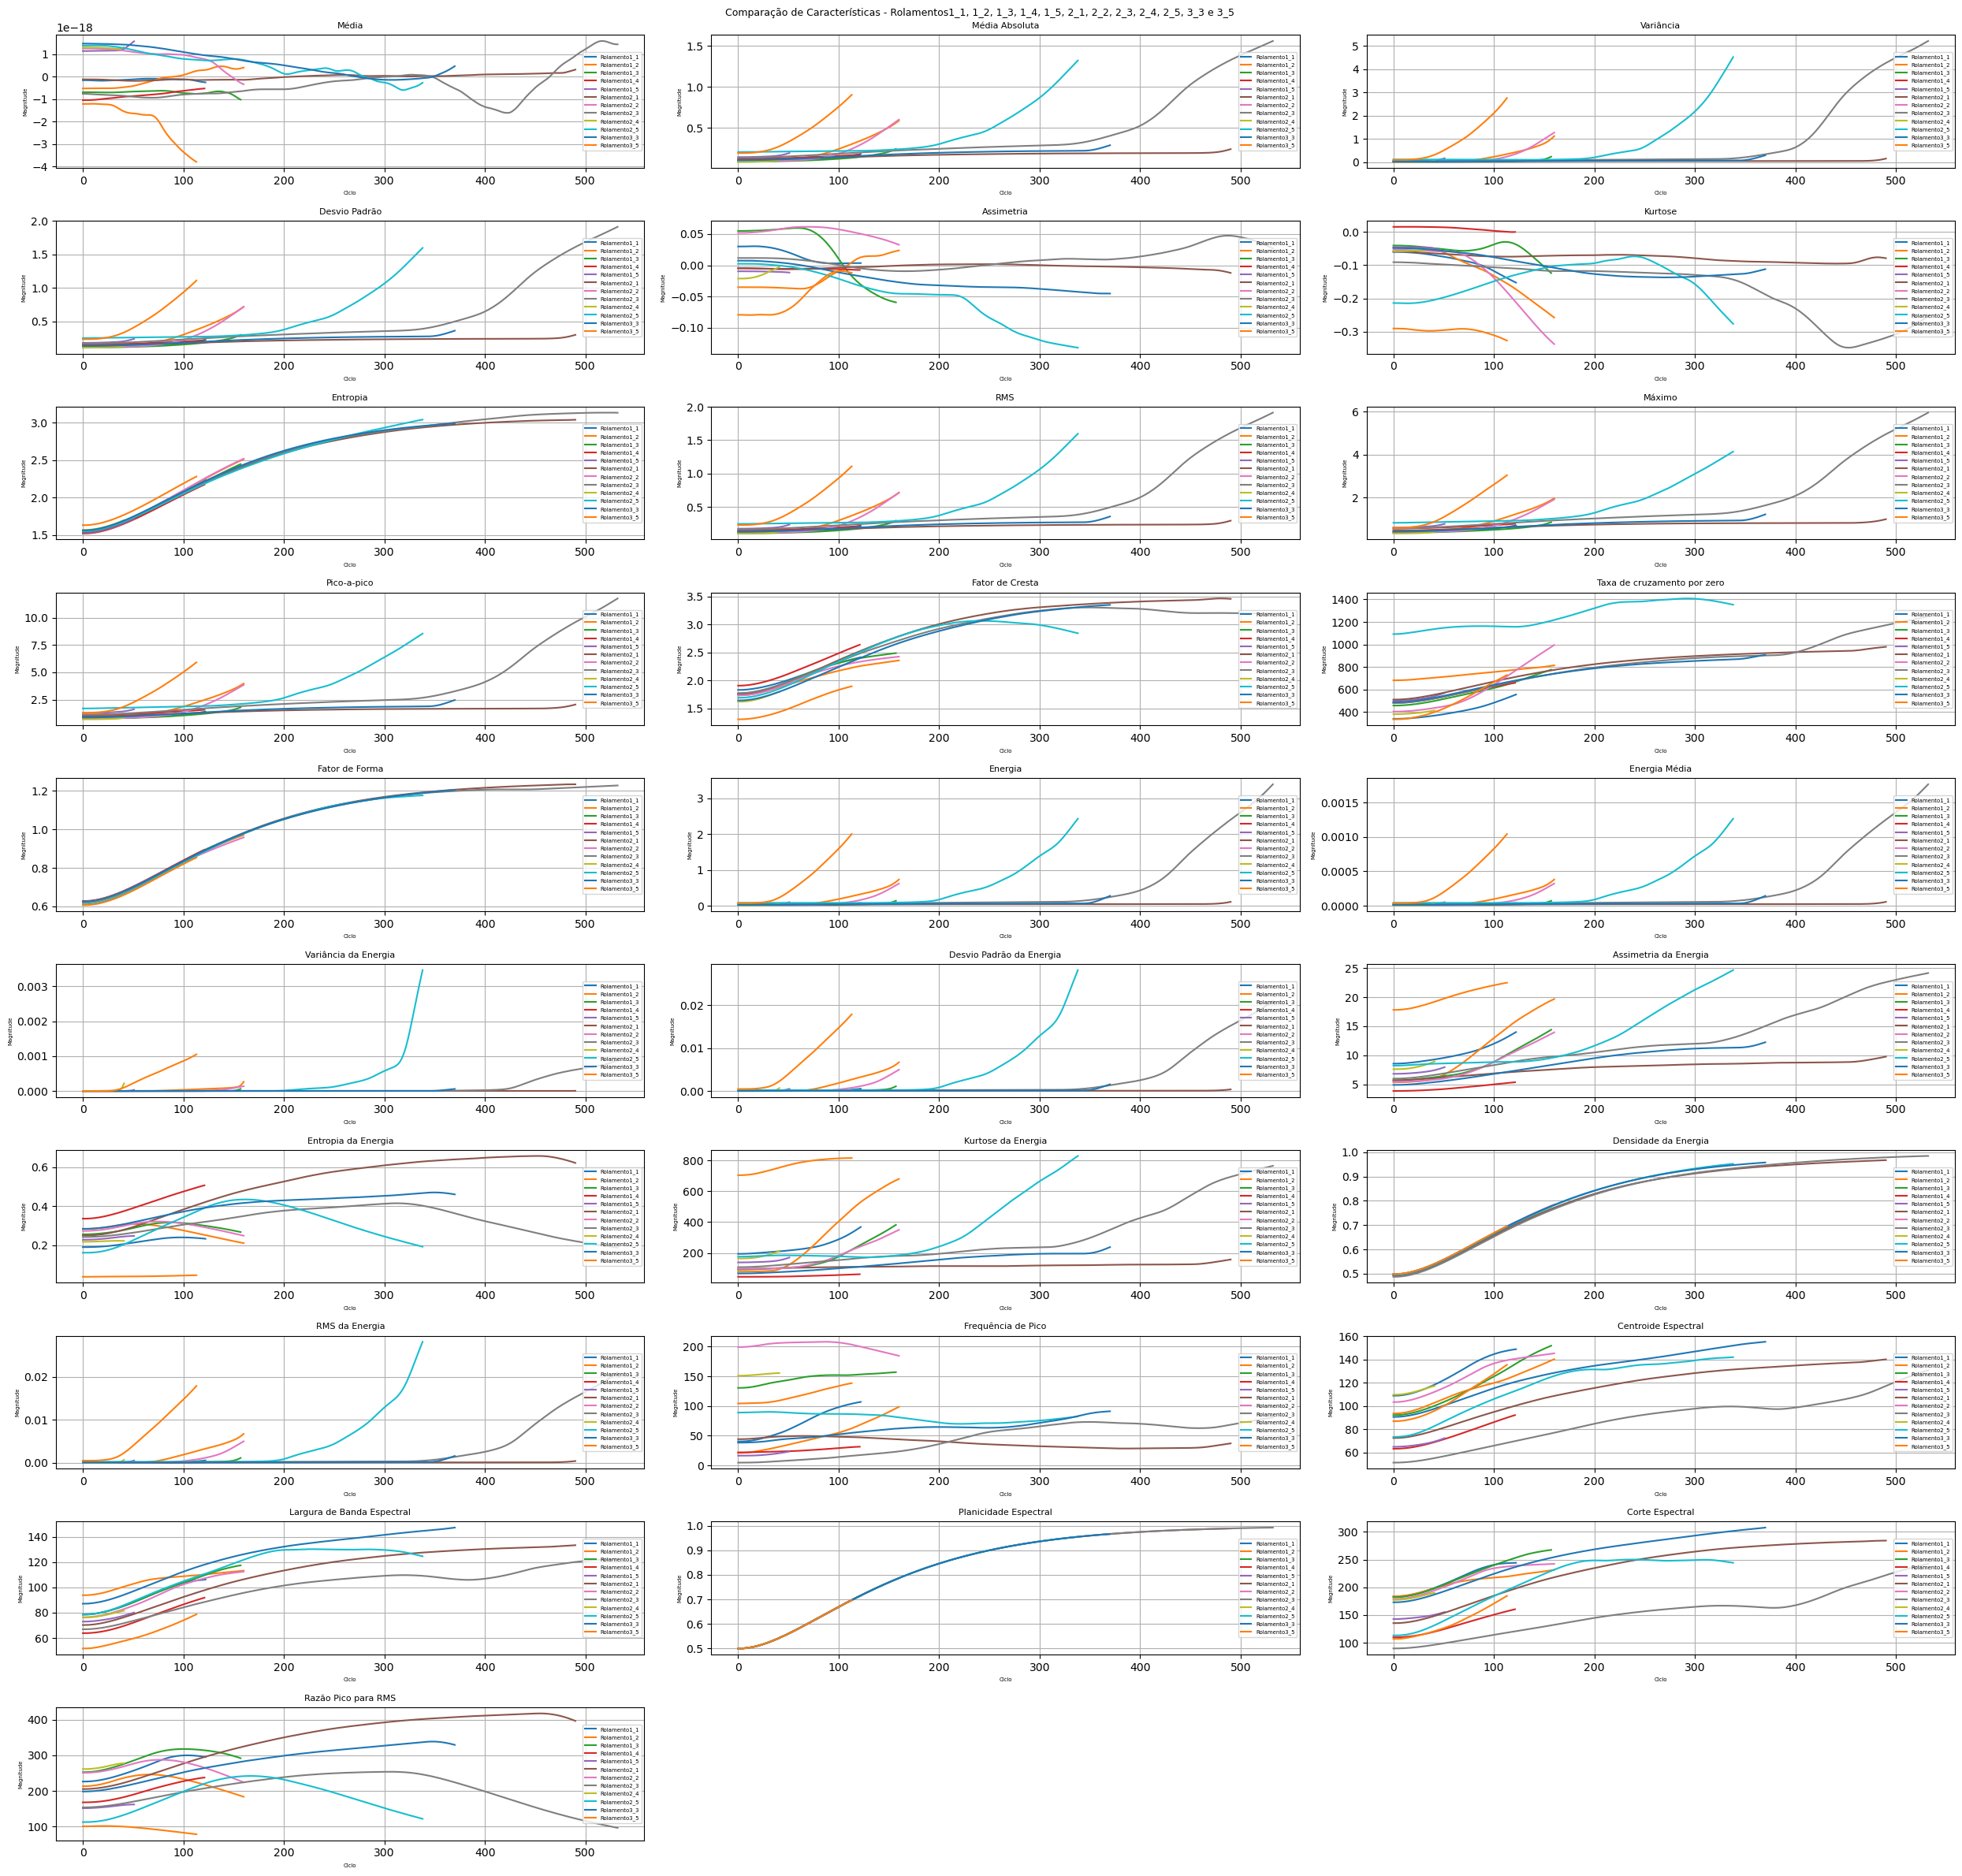

In [10]:
dir = '02_FTRSX/'
out = '02_FTRSX_SMOOTH/'

dir = '03_FTRSY/'
out = '03_FTRSY_SMOOTH/'


brngs = os.listdir(dir)
labels = [('Rolamento'+brngs[i][7:-4]) for i in range(len(brngs))]
qtd=6
dfs = []
for brng in brngs:
    path = dir+brng
    df = pd.read_csv(dir+brng)
    df = moving_average_df(df,10) #5
    df=exponential_moving_average_df(df, alpha=0.015) #0.015
    df=exponential_moving_average_df(df, alpha=0.01) #0.015
    df.to_csv(out+brng, index=False)
    dfs.append(df)
plot_multiple_features(dfs,out, 3, brngs, labels, show=False, w=25, h=25)

Index(['Variância', 'Pico-a-pico', 'Média Absoluta', 'RMS', 'Probability',
       'Energia Média', 'Máximo', 'Energia', 'Entropia',
       'Densidade da Energia', 'Desvio Parão'],
      dtype='object')

FILTER BY METRICS (MONOTONICITY, TRENDABILITY AND CORRELATION)

In [ ]:
dir, out = '02_FTRSX_SMOOTH/', '02_FTRSX_FLTR/'

dir, out = '03_FTRSY_SMOOTH/', '03_FTRSY_FLTR/'



brngs = os.listdir(dir)
qtd=4
for brng in brngs:
    path = dir+brng
    df = pd.read_csv(dir+brng)
    df = plot_metrics(df,out,cols_qtd=qtd,brng=brng, show=False, w = 8, h=6)
    #print('---------')
    df.to_csv(out+brng, index=False)

SELECT THE SAME FEATURES

In [17]:
dir, out = '02_FTRSX_FLTR/', '02_FTRSX_FINAL/'
#dir, out ='03_FTRSY_FLTR/', '03_FTRSY_FINAL/'

brngs = os.listdir(dir)
clmns = []
for brng in brngs:
    df=pd.read_csv(dir+brng)
    clmns.append(df.columns)
features = set(clmns[0]).intersection(*clmns[1:])
features = list(features)

for brng in brngs:
    df_r = pd.DataFrame()
    df=pd.read_csv(dir+brng)

    for feature in features:
        df_r[feature] = df[feature]
    df_r.to_csv(out+brng,index=False)
print(df_r.columns)

dir, out ='03_FTRSY_SMOOTH/', '03_FTRSY_FINAL/'
brngs = os.listdir(dir)

for brng in brngs:
    df_r = pd.DataFrame()
    df=pd.read_csv(dir+brng)

    for feature in features:
        df_r[feature] = df[feature]
    df_r.to_csv(out+brng,index=False)
print(df_r.columns)


Index(['Fator de Forma', 'Densidade da Energia', 'Fator de Cresta',
       'Desvio Padrão', 'Largura de Banda Espectral', 'Planicidade Espectral',
       'Média Absoluta', 'RMS', 'Entropia'],
      dtype='object')
Index(['Fator de Forma', 'Densidade da Energia', 'Fator de Cresta',
       'Desvio Padrão', 'Largura de Banda Espectral', 'Planicidade Espectral',
       'Média Absoluta', 'RMS', 'Entropia'],
      dtype='object')


02: Index(['Fator de Forma', 'Densidade da Energia', 'Fator de Cresta',
       'Desvio Padrão', 'Largura de Banda Espectral', 'Planicidade Espectral',
       'Média Absoluta', 'RMS', 'Entropia'],
      dtype='object')

03: Index(['Fator de Forma', 'Densidade da Energia', 'Fator de Cresta', 'Energia',
       'Desvio Padrão', 'Kurtose da Energia', 'Planicidade Espectral',
       'Taxa de cruzamento por zero', 'Energia Média', 'Média Absoluta', 'RMS',
       'Pico-a-pico', 'Assimetria da Energia', 'Máximo', 'Entropia'],
      dtype='object')

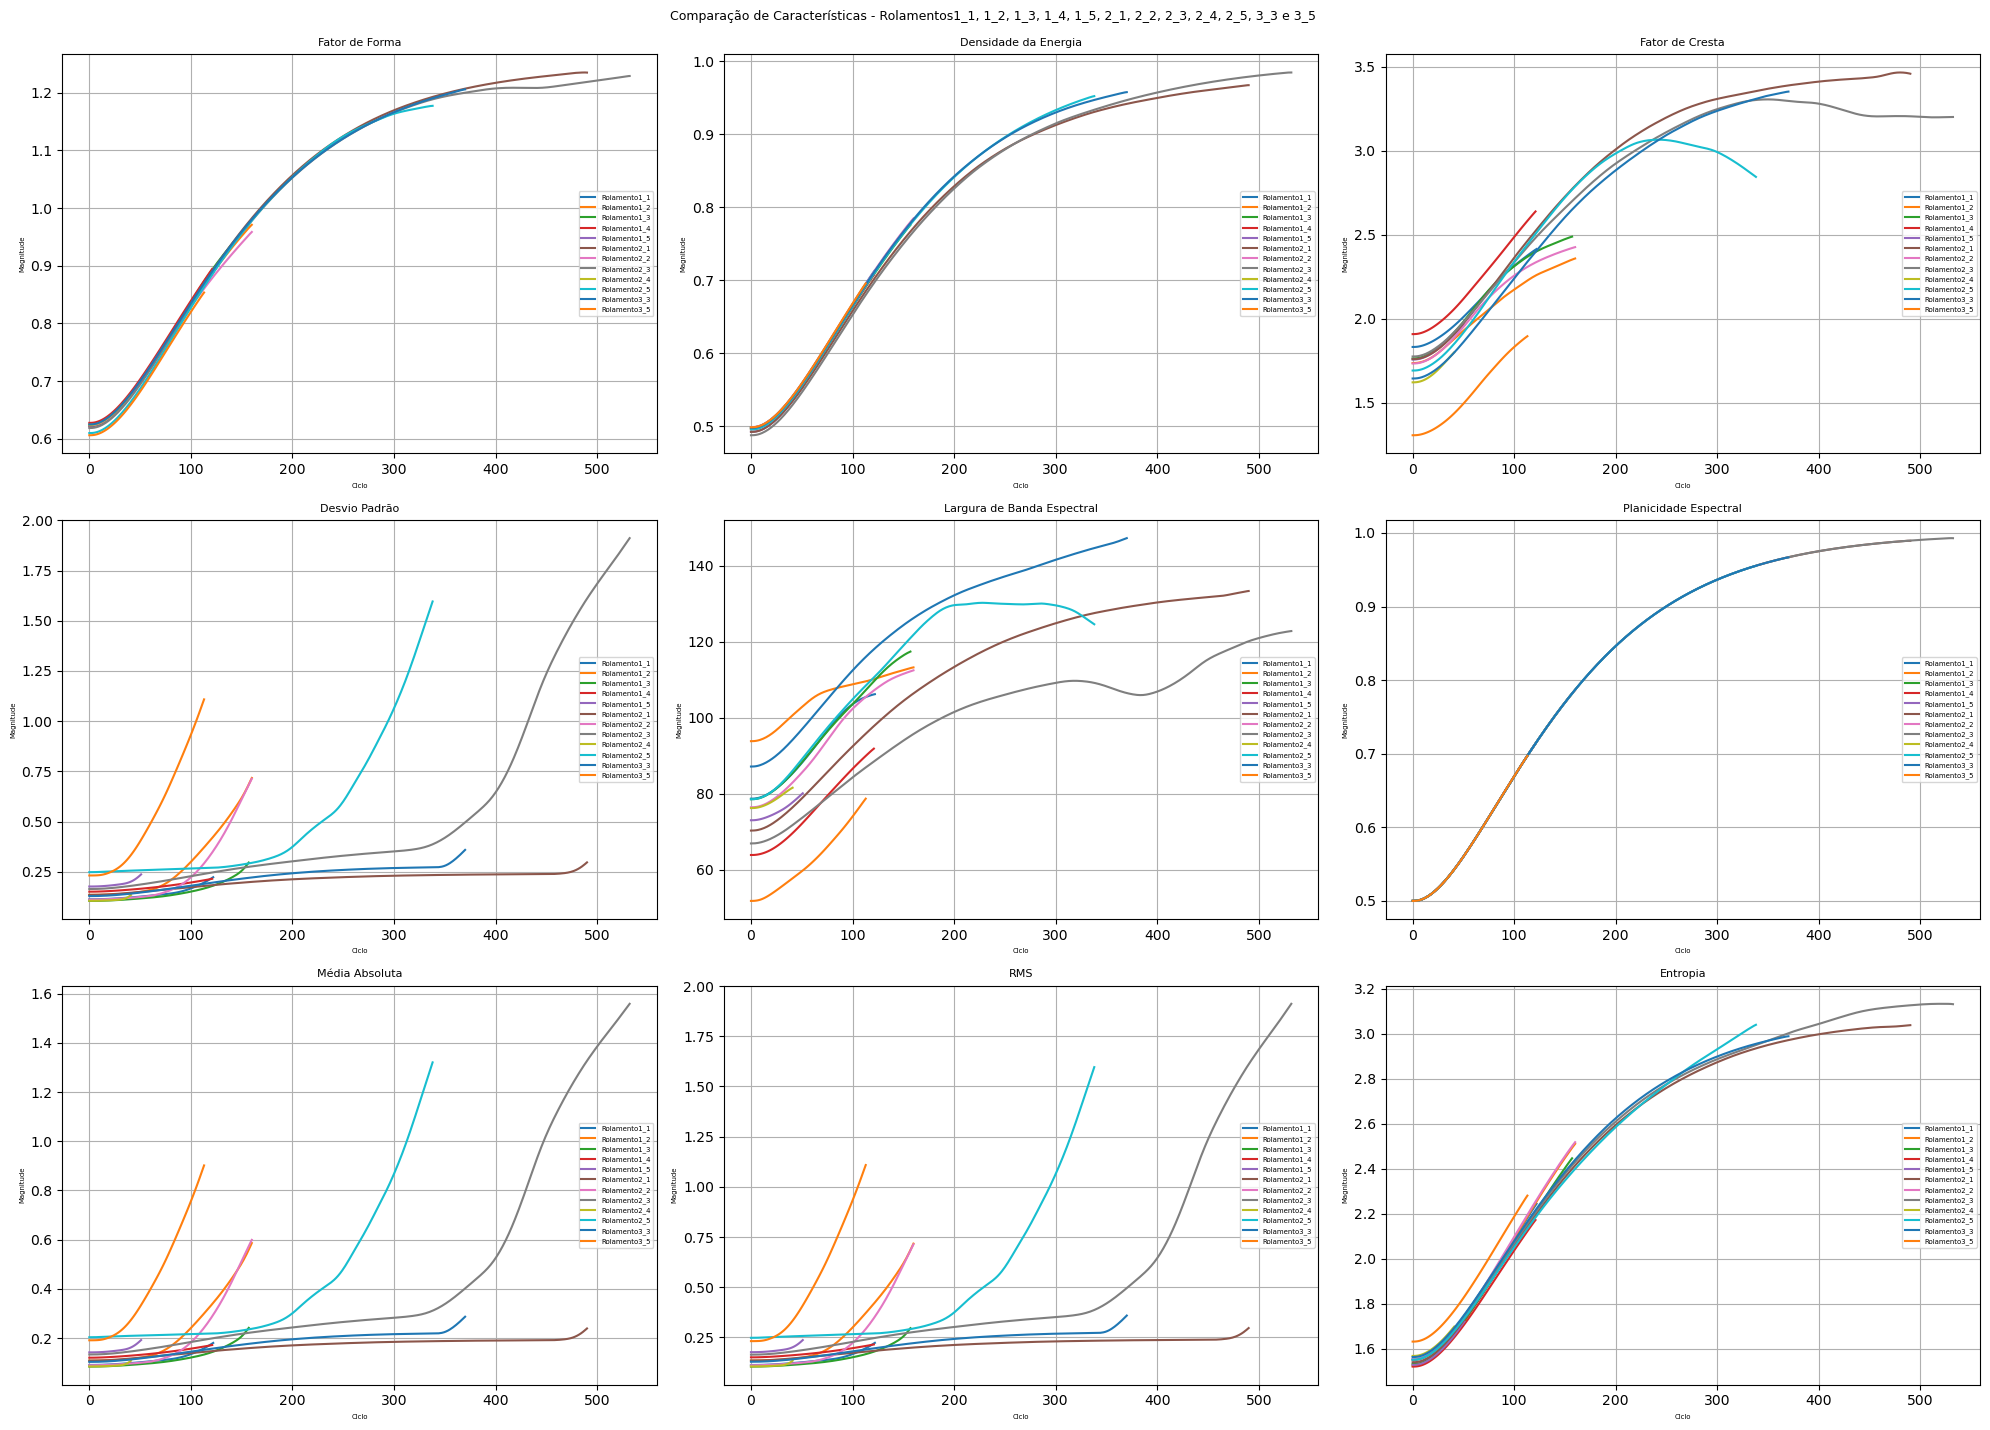

In [19]:
dir = '03_FTRSY_FINAL/'
#dir = '02_FTRSX_FINAL/'

brngs = os.listdir(dir)
labels = [('Rolamento'+brngs[i][7:-4]) for i in range(len(brngs))]
qtd=6
dfs = []
for brng in brngs:
    path = dir+brng
    df = pd.read_csv(dir+brng)
    dfs.append(df)
plot_multiple_features(dfs,out, 3, brngs, labels, show=False, w=20, h=15)

CREATE PCA HI

In [23]:
dir,out = '03_FTRSY_FINAL/', 'HIY2/'
#dir,out = '02_FTRSX_FINAL/','HIX2/'


brngs = os.listdir(dir)
dataframes, dfs, lens =[], [], [0]
qtd=4

for brng in brngs:
        path = dir+brng
        print(path)
        df = pd.read_csv(path)
        dataframes.append(df)
        lens.append(len(df)+lens[-1])

df_r = pd.concat(dataframes,ignore_index=True)
df_r = normalize_df(df_r)
dataframes = [df_r[lens[i]:lens[i+1]] for i in range(len(lens)-1)]

for frame,brng in zip(dataframes,brngs):
    dados_fundidos, modelo_pca = aplicar_pca_e_fundir(frame, n_componentes=3)
    dados_fundidos.to_csv(out+brng,index=False)
    dfs.append(dados_fundidos)

df_r = pd.concat(dfs,ignore_index=True)
df_r = normalize_df(df_r)
dfs = [df_r[lens[i]:lens[i+1]] for i in range(len(lens)-1)]
for df,brng in zip(dfs,brngs):
    df.to_csv(out+brng,index=False)


03_FTRSY_FINAL/Bearing1_1.csv
03_FTRSY_FINAL/Bearing1_2.csv
03_FTRSY_FINAL/Bearing1_3.csv
03_FTRSY_FINAL/Bearing1_4.csv
03_FTRSY_FINAL/Bearing1_5.csv
03_FTRSY_FINAL/Bearing2_1.csv
03_FTRSY_FINAL/Bearing2_2.csv
03_FTRSY_FINAL/Bearing2_3.csv
03_FTRSY_FINAL/Bearing2_4.csv
03_FTRSY_FINAL/Bearing2_5.csv
03_FTRSY_FINAL/Bearing3_3.csv
03_FTRSY_FINAL/Bearing3_5.csv


In [24]:
dir = 'HIY2/'
#dir = 'HIX2/'
brngs = os.listdir(dir)
dataframes, dfs, lens =[], [], [0]
qtd=6

for brng in brngs:
    path = dir+brng
    df = pd.read_csv(path)
    #minV = np.min(df['PC1'])
    #df = df-minV
    
    dataframes.append(-df)
    lens.append(len(df)+lens[-1])

df_r = pd.concat(dataframes,ignore_index=True)
df_r = normalize_df(df_r)
dataframes = [df_r[lens[i]:lens[i+1]] for i in range(len(lens)-1)]

for df,brng in zip(dataframes,brngs):
    df.to_csv(out+brng,index=False)
i=0

PLOT HEALTH/DEGRADATION INDICATOR

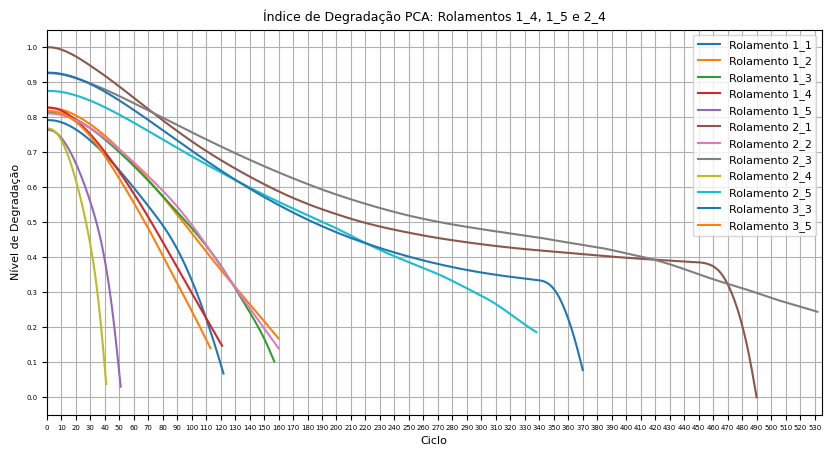

In [22]:
labels = [brng[:-4] for brng in brngs]
length = 0
plt.figure(figsize=(10, 5))
for i,df in enumerate(dataframes,start=0):
    if len(df) > length:
        length = len(df)
    hi = df['PC1'].values
    plt.plot(hi,linestyle='-',markersize =2, label='Rolamento '+labels[i][7:])
plt.legend(loc="upper right",fontsize = 8) 
plt.xlabel("Ciclo",fontsize=8)
plt.ylabel("Nível de Degradação",fontsize=8)
plt.title("Índice de Degradação PCA: Rolamentos 1_4, 1_5 e 2_4",fontsize = 9)
xticks = list(np.arange(0, ((int(length/5)+1)*5), 10))
yticks = list(np.arange(0, 1.05, 0.1))
plt.xlim(0,((int(length/5)+1)*5))
plt.xticks(sorted(xticks), fontsize=5, color='black')
plt.yticks(sorted(yticks), fontsize=5, color='black')
plt.grid(True)
#plt.savefig(out+'PCA_HI.eps', dpi=500)
#plt.savefig(out+'PCA_HI.png', dpi=500)
plt.show()

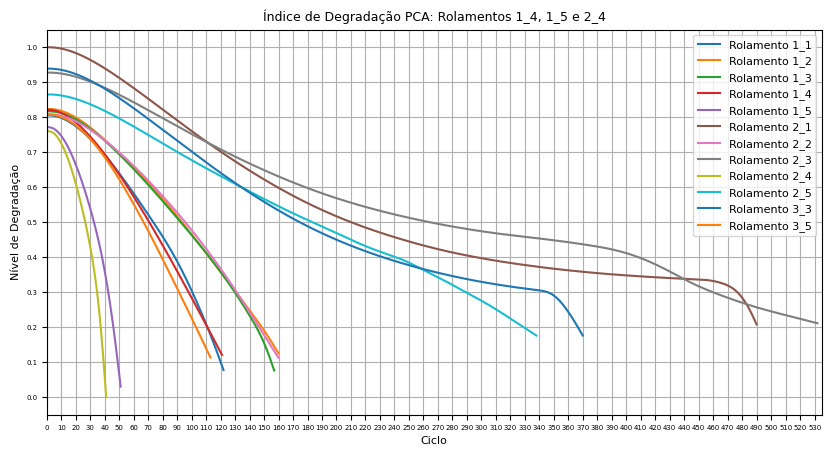

In [25]:
labels = [brng[:-4] for brng in brngs]
length = 0
plt.figure(figsize=(10, 5))
for i,df in enumerate(dataframes,start=0):
    if len(df) > length:
        length = len(df)
    hi = df['PC1'].values
    plt.plot(hi,linestyle='-',markersize =2, label='Rolamento '+labels[i][7:])
plt.legend(loc="upper right",fontsize = 8) 
plt.xlabel("Ciclo",fontsize=8)
plt.ylabel("Nível de Degradação",fontsize=8)
plt.title("Índice de Degradação PCA: Rolamentos 1_4, 1_5 e 2_4",fontsize = 9)
xticks = list(np.arange(0, ((int(length/5)+1)*5), 10))
yticks = list(np.arange(0, 1.05, 0.1))
plt.xlim(0,((int(length/5)+1)*5))
plt.xticks(sorted(xticks), fontsize=5, color='black')
plt.yticks(sorted(yticks), fontsize=5, color='black')
plt.grid(True)
#plt.savefig(out+'PCA_HI.eps', dpi=500)
#plt.savefig(out+'PCA_HI.png', dpi=500)
plt.show()

In [185]:
dir1 = '03_FTRSY_FLTR/'
dir2 = '02_FTRSX_FLTR/'
out = '04_FTRS_FUSED/'
brngs = os.listdir(dir1)

for brng in brngs:
    path = dir1+brng
    df1 = pd.read_csv(path)
    path = dir2+brng
    df2 = pd.read_csv(path)
    df = pd.concat([df1,df2],axis=1)
    df.to_csv(out+brng, index=False)

In [186]:
dir = '04_FTRS_FUSED/'
out = 'HI/'

brngs = os.listdir(dir)
dataframes, dfs, lens =[], [], [0]
qtd=4

for brng in brngs:
        path = dir+brng
        print(path)
        df = pd.read_csv(path)
        dataframes.append(df)
        lens.append(len(df)+lens[-1])

df_r = pd.concat(dataframes,ignore_index=True)
df_r = normalize_df(df_r)
dataframes = [df_r[lens[i]:lens[i+1]] for i in range(len(lens)-1)]

for frame,brng in zip(dataframes,brngs):
    dados_fundidos, modelo_pca = aplicar_pca_e_fundir(frame, n_componentes=10)
    dados_fundidos.to_csv(out+brng,index=False)
    dfs.append(dados_fundidos)

df_r = pd.concat(dfs,ignore_index=True)
df_r = normalize_df(df_r)
dfs = [df_r[lens[i]:lens[i+1]] for i in range(len(lens)-1)]
for df,brng in zip(dfs,brngs):
    df.to_csv(out+brng,index=False)


04_FTRS_FUSED/Bearing1_1.csv
04_FTRS_FUSED/Bearing1_2.csv
04_FTRS_FUSED/Bearing1_3.csv
04_FTRS_FUSED/Bearing1_4.csv
04_FTRS_FUSED/Bearing1_5.csv
04_FTRS_FUSED/Bearing2_1.csv
04_FTRS_FUSED/Bearing2_2.csv
04_FTRS_FUSED/Bearing2_3.csv
04_FTRS_FUSED/Bearing2_4.csv
04_FTRS_FUSED/Bearing2_5.csv
04_FTRS_FUSED/Bearing3_3.csv
04_FTRS_FUSED/Bearing3_5.csv


In [187]:
dir = 'HI/'

brngs = os.listdir(dir)
dataframes, dfs, lens =[], [], [0]
qtd=6

for brng in brngs:
    path = dir+brng
    df = pd.read_csv(path)
    #minV = np.min(df['PC1'])
    #df = df-minV
    
    dataframes.append(-df)
    lens.append(len(df)+lens[-1])

df_r = pd.concat(dataframes,ignore_index=True)
df_r = normalize_df(df_r)
dataframes = [df_r[lens[i]:lens[i+1]] for i in range(len(lens)-1)]

for df,brng in zip(dataframes,brngs):
    df.to_csv(out+brng,index=False)
i=0

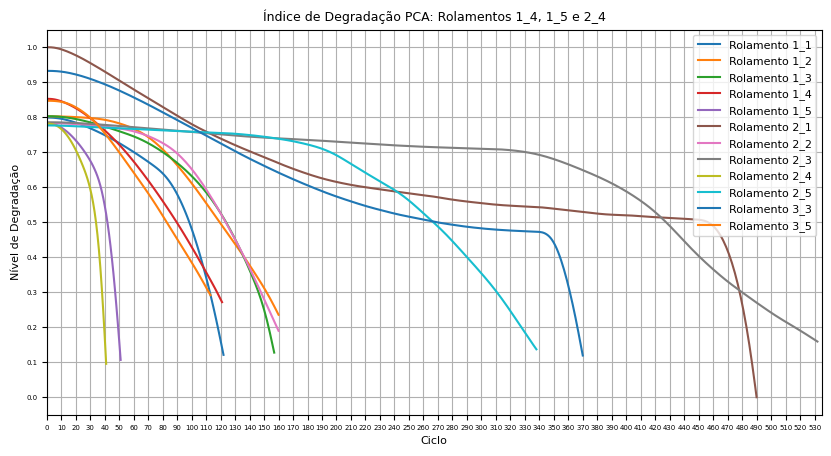

In [188]:
labels = [brng[:-4] for brng in brngs]
length = 0
plt.figure(figsize=(10, 5))
for i,df in enumerate(dataframes,start=0):
    if len(df) > length:
        length = len(df)
    hi = df['PC1'].values
    plt.plot(hi,linestyle='-',markersize =2, label='Rolamento '+labels[i][7:])
plt.legend(loc="upper right",fontsize = 8) 
plt.xlabel("Ciclo",fontsize=8)
plt.ylabel("Nível de Degradação",fontsize=8)
plt.title("Índice de Degradação PCA: Rolamentos 1_4, 1_5 e 2_4",fontsize = 9)
xticks = list(np.arange(0, ((int(length/5)+1)*5), 10))
yticks = list(np.arange(0, 1.05, 0.1))
plt.xlim(0,((int(length/5)+1)*5))
plt.xticks(sorted(xticks), fontsize=5, color='black')
plt.yticks(sorted(yticks), fontsize=5, color='black')
plt.grid(True)
#plt.savefig(out+'PCA_HI.eps', dpi=500)
#plt.savefig(out+'PCA_HI.png', dpi=500)
plt.show()

In [243]:
dir1 = '02_VMDX_FFT_CP/'
dir2 = '03_VMDY_FFT_CP/'
out = '04_RS_FUSED/'
brngs = os.listdir(dir1)

for brng in brngs:
    path = dir1+brng
    df1 = pd.read_csv(path)
    path = dir2+brng
    df2 = pd.read_csv(path)
    df = pd.concat([df1,df2],axis=1)
    df.to_csv(out+brng, index=False)

In [244]:
dir = '04_RS_FUSED/'
out = '04_RS_FUSED/'

brngs = os.listdir(dir)
dataframes, dfs, lens =[], [], [0]
qtd=4

for brng in brngs:
        path = dir+brng
        print(path)
        df = pd.read_csv(path)
        dataframes.append(df)
        lens.append(len(df)+lens[-1])

df_r = pd.concat(dataframes,ignore_index=True)
#df_r = normalize_df(df_r)
dataframes = [df_r[lens[i]:lens[i+1]] for i in range(len(lens)-1)]

for frame,brng in zip(dataframes,brngs):
    dados_fundidos, modelo_pca = aplicar_pca_e_fundir(frame, n_componentes=2)
    dados_fundidos.to_csv(out+brng,index=False)
    dfs.append(dados_fundidos)

df_r = pd.concat(dfs,ignore_index=True)
df_r = normalize_df(df_r)
dfs = [df_r[lens[i]:lens[i+1]] for i in range(len(lens)-1)]
for df,brng in zip(dfs,brngs):
    df.to_csv(out+brng,index=False)

04_RS_FUSED/Bearing1_1.csv
04_RS_FUSED/Bearing1_2.csv
04_RS_FUSED/Bearing1_3.csv
04_RS_FUSED/Bearing1_4.csv
04_RS_FUSED/Bearing1_5.csv
04_RS_FUSED/Bearing2_1.csv
04_RS_FUSED/Bearing2_2.csv
04_RS_FUSED/Bearing2_3.csv
04_RS_FUSED/Bearing2_4.csv
04_RS_FUSED/Bearing2_5.csv
04_RS_FUSED/Bearing3_3.csv
04_RS_FUSED/Bearing3_5.csv


In [245]:
dir = '04_RS_FUSED/'

brngs = os.listdir(dir)
dataframes, dfs, lens =[], [], [0]
qtd=6

for brng in brngs:
    path = dir+brng
    df = pd.read_csv(path)
    #minV = np.min(df['PC1'])
    #df = df-minV
    
    dataframes.append(df)
    lens.append(len(df)+lens[-1])

df_r = pd.concat(dataframes,ignore_index=True)
df_r = normalize_df(df_r)
dataframes = [df_r[lens[i]:lens[i+1]] for i in range(len(lens)-1)]

for df,brng in zip(dataframes,brngs):
    df.to_csv(out+brng,index=False)
i=0

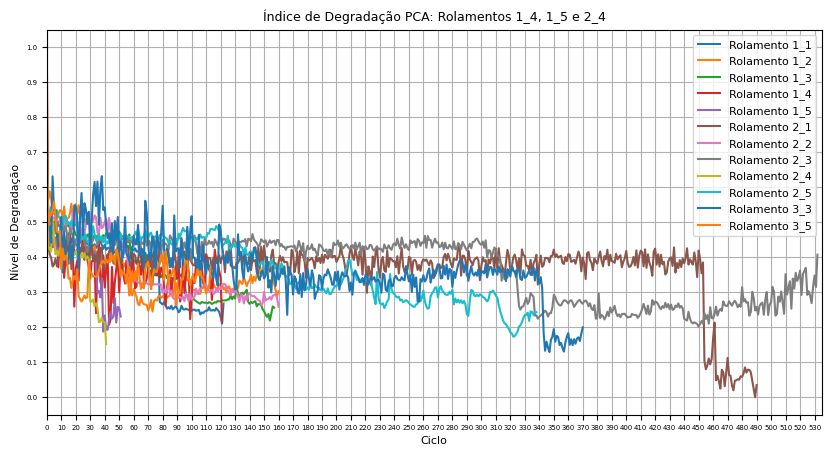

In [246]:
labels = [brng[:-4] for brng in brngs]
length = 0
plt.figure(figsize=(10, 5))
for i,df in enumerate(dataframes,start=0):
    if len(df) > length:
        length = len(df)
    hi = df['PC1'].values
    plt.plot(hi,linestyle='-',markersize =2, label='Rolamento '+labels[i][7:])
plt.legend(loc="upper right",fontsize = 8) 
plt.xlabel("Ciclo",fontsize=8)
plt.ylabel("Nível de Degradação",fontsize=8)
plt.title("Índice de Degradação PCA: Rolamentos 1_4, 1_5 e 2_4",fontsize = 9)
xticks = list(np.arange(0, ((int(length/5)+1)*5), 10))
yticks = list(np.arange(0, 1.05, 0.1))
plt.xlim(0,((int(length/5)+1)*5))
plt.xticks(sorted(xticks), fontsize=5, color='black')
plt.yticks(sorted(yticks), fontsize=5, color='black')
plt.grid(True)
#plt.savefig(out+'PCA_HI.eps', dpi=500)
#plt.savefig(out+'PCA_HI.png', dpi=500)
plt.show()

In [304]:
dir1 = '02_VMDX_FFT_CP/'
dir2 = '03_VMDY_FFT_CP/'
out = '04_RS_FUSED/'
brngs = os.listdir(dir1)

for brng in brngs:
    print(brng)
    path = dir1+brng
    df1 = pd.read_csv(path)
    df1n = normalize_df(-df1)
    df1x = df1*df1n.copy()
    path = dir2+brng
    df2 = pd.read_csv(path)
    df2n = normalize_df(-df2)
    df2x = df2*df2n.copy()
    
    df = pd.concat([df1x,df2x],axis=1)
    df.columns = ['RSX','RSY']
    df.to_csv(out+brng,index=False)
    
    

Bearing1_1.csv
Bearing1_2.csv
Bearing1_3.csv
Bearing1_4.csv
Bearing1_5.csv
Bearing2_1.csv
Bearing2_2.csv
Bearing2_3.csv
Bearing2_4.csv
Bearing2_5.csv
Bearing3_3.csv
Bearing3_5.csv


In [335]:
def calculate_slope(vec):
    """
    Function to calculate the slope between each consecutive point in a time series.

    Parameters:
    - time: A numpy array representing the time values.
    - values: A numpy array representing the values corresponding to each time point.

    Returns:
    - A numpy array containing the slope between each consecutive point.
    """
    time = np.arange(len(vec))
    # Calculate the differences between consecutive points
    delta_values = np.diff(vec)
    delta_time = np.diff(time)
    
    # Calculate the slope (difference in values / difference in time)
    slopes = delta_values / delta_time

    return slopes

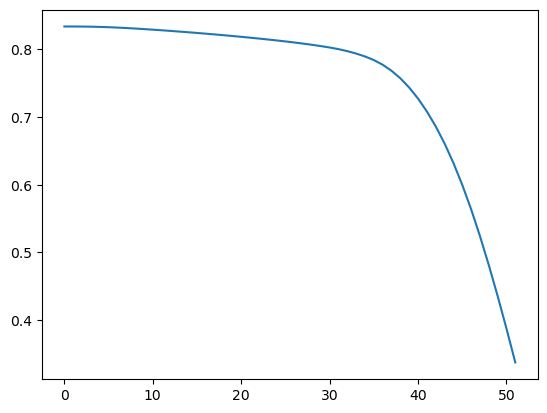

In [336]:
path = r'HIX\Bearing1_5.csv'
df = pd.read_csv(path)
hi = df['PC1'].values
tg = calculate_slope(hi)
plt.plot(hi)